In [1]:
#import statements
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read data
data = np.genfromtxt('data.csv', delimiter = ',')
#reshape numpy array
X = data[:,0].reshape(-1,1) #-1 tells numpy to figure out dimension
ones = np.ones([X.shape[0], 1])
X = np.concatenate([ones, X], 1)
y = data[:, 1].reshape(-1,1)

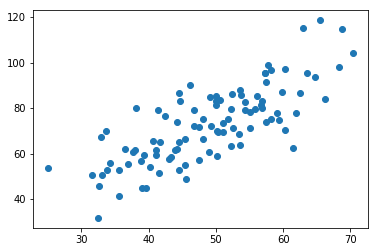

In [7]:
plt.scatter(data[:,0].reshape(-1,1), y)
plt.show()

In [8]:
#setting hyperparameters, i.e. learning rate and number of iterations
#theta values are slope and intercept values of the regression line equation, i.e. m and c from y = mx + c

alpha = 0.0001
iters = 1000
theta = np.array([[1.0, 1.0]])

#### Cost function
Find difference between predicted value and original y values and sum it up. Then find average and return it. The returned value is the cost

In [9]:
#cost function
#inner calculates dot product of X and theta raised to power of two, then summed up, and divided by 2*length of X and returned
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ is matrix multiplication of arrays, to use *, have to convert arrays to matrices
    return np.sum(inner) / (2 * len(X))

Run cost function without tuning

In [10]:
computeCost(X, y, theta)

319.40631589398157

#### Gradient descent function
Find optimum value for the theta parameters so that cost decreases

In [11]:
def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis = 0)
        cost = computeCost(X , y, theta)
    return (theta, cost)

In [14]:
#find new theta and cost
g, cost = gradientDescent(X, y, theta, alpha, iters)
print(f"Cost: {cost}")

Cost: 56.0419737779817


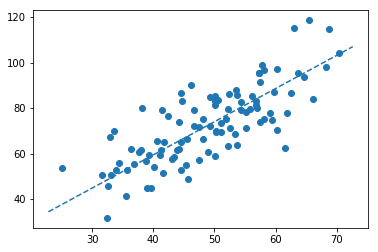

In [16]:
#Scatterplot for regression
plt.scatter(data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = g[0][0] + g[0][1]* x_vals
plt.plot(x_vals, y_vals, '--')
plt.show()